In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt, matplotlib.dates as mdates
from copy import deepcopy
df = pd.read_csv('df.csv').iloc[38:, :]
df.columns

Index(['date_time', 'Open', 'high', 'Low', 'Close', 'Volume', 'volume_adi',
       'volume_obv', 'volume_cmf', 'volume_fi',
       ...
       'low_dpo', 'high_coppock', 'low_coppock', 'high_poly_interpolation',
       'low_poly_interpolation', 'parabolic_sar', 'high_bool__low_bool',
       'high_label_bool__low_label_bool', 'weekday', 'hour'],
      dtype='object', length=109)

In [12]:
def grafico(df):
    multiplicador = 500  # multiplcador de $
    df["money_return"] = df["money_return"] * multiplicador
    df = df[df["pred_percent"] >= (40 / 100)].iloc[:, :]

    percentual = 0.12 # percentual minimo de lucro ou prejuizo da plataforma
    percentual_max = 0.99 # percentual minimo de lucro ou prejuizo da plataforma
    investimento = 10 # reais
    taxa = 0.42 # relacioando a -> investimento = 10 

    # df_money = np.array((df[((df["money_return"] > percentual) & (df["money_return"] < percentual_max)) | 
    #             (df["money_return"] < -percentual) & (df["money_return"] > -percentual_max)]['money_return'] * 10) - 0.42)

    df_money = (df[((df["money_return"] > percentual) & (df["money_return"] < percentual_max)) | 
                (df["money_return"] < -percentual) & (df["money_return"] > -percentual_max)])


    df_money = df_money.loc[:, ['date_time','money_return']]
    array = np.array((df_money['money_return'] * investimento) - taxa)

    agg_money = []
    for i in range(len(array)):
        _sum = 0
        for j in range(i):
            _sum = _sum + array[j]
        agg_money.append(_sum)

    df_money['agg_money'] = agg_money
    df_money['id'] = df_money.index

    money = df_money['money_return'].sum() * 10 - (len(df_money) * 0.42)
    print('Numero de trades: ' + str(len(df_money)))
    print('Media de porcentagem ganhar por hora: ' + str(int(money / (len(df) / 24))))
    print('Porcentagem ganha total: ' + str(int(money)))

    plt.figure(figsize=(8,6))
    sns.lineplot(x='id',y='agg_money', data=df_money)
    # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    # plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1)) 
    plt.show()

df_10 = pd.read_csv('epochs_10.csv')
df_30 = pd.read_csv('epochs_30.csv')

Numero de trades: 393
Media de porcentagem ganhar por hora: 3.2515212717069475
Porcentagem ganha total: 152


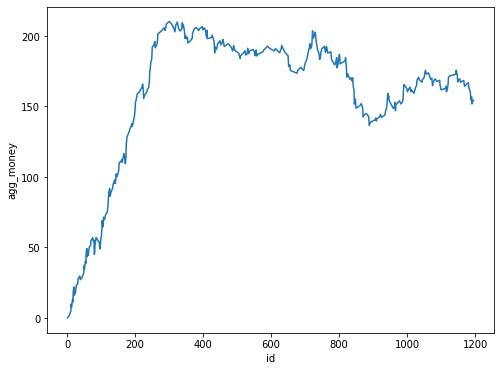

Numero de trades: 2206
Media de porcentagem ganhar por hora: 16.160015328941018
Porcentagem ganha total: 2674


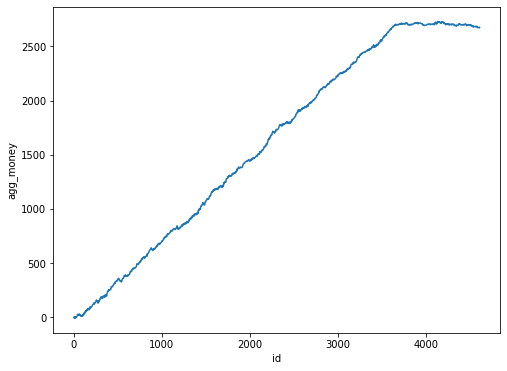

In [13]:
grafico(deepcopy(df_30))
grafico(deepcopy(df_10))

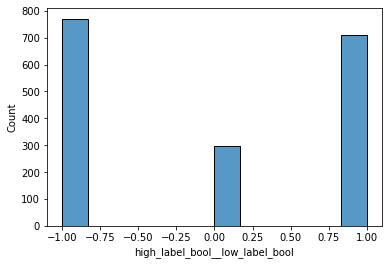

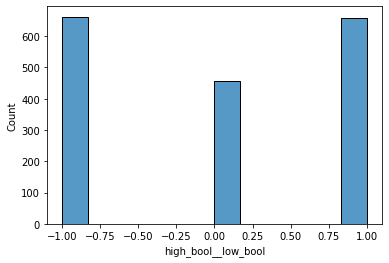

In [29]:
sns.histplot(data=df, x='high_label_bool__low_label_bool')
plt.show()
sns.histplot(data=df, x='high_bool__low_bool')
plt.show()
# sns.histplot(data=df, x='close_bool__high_bool__low_bool')
# plt.show()

In [4]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df['date_time'],
                open=df['Open'],
                high=df['high'],
                Low=df['Low'],
                Close=df['Close'])])

fig.show()

<AxesSubplot:xlabel='Low', ylabel='parabolic_sar'>

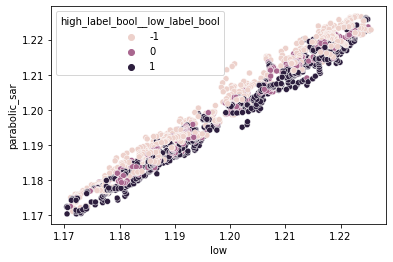

In [30]:
%matplotlib inline  

sns.scatterplot(data=df, x='Low', y='parabolic_sar', hue='high_label_bool__low_label_bool')


In [8]:
# %matplotlib qt
# def graph_3d(df):
#     sep = 'parabolic_sar_9'
#     hue = 'high_bool__low_bool'
#     Low = 'Low'
#     high = 'high'
#     df_def = df.loc[:, [high, Low, sep, hue]]
#     sns.set(style = "darkgrid")

#     fig = plt.figure(figsize=(15, 10), dpi=80)
#     ax = fig.add_subplot(111, projection = '3d')

#     ax.set_xlabel("high")
#     ax.set_ylabel("Low")
#     ax.set_zlabel("Close")

#     x = df_def[hue]
#     for i in df_def[hue].unique():
#         ax.scatter(df_def[high][x == i], df_def[Low][x == i], df_def[sep][x == i], label=i)

#     plt.show()

# col = 'high_label_bool__low_label_bool'
# # graph_3d(df[df[col] == 0])
# # graph_3d(df[df[col] == -1])
# graph_3d(df[df[col] == 1])